# Code calibration Example



The simply supported beam is to be designed with a given target reliability. A self weight $G$ is uniformly distributed over the span $l$ of the beam. The time-variable load is acting at mid-span and represented by the yearly extreme value distribution $Q$.  The basic random variables that represent the situation are given in the table below. The reliability requirement is introduced as a target reliability index with a one year reference period $\beta_t=4.7$. The resulting beam span and cross-section modulus are dependent on the design philosophy that is followed. The following formats are to be considered: reliability based design, load and resistance factor design and global partial safety factor.

![Image of the beam](simplebeam1.pdf)

|                                    | $G$        | $Q$  | $F_m$  |
|------------------------------------|------------|---------|---------|
| Distribution                       | Normal     | Normal  | Normal  |
| Mean ($\mu_X$)                 | 2 N/mm     | 10000 N | 200 MPa |
| Standard dev. ($\sigma_X$)    | 0.30 N/mm | 4000 N  | 20 MPa  |
| Coeff. of var. ($COV_X$\)      | 15\%      | 50\%   | 10\\%   |
| Characteristic fractile ($k_X$) | 0.50      | 0.98   | 0.05   |

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
## some general plotting settings:
fontsizes=18
plt.rcParams.update({'font.size': fontsizes})
plt.rcParams.update({"font.family": "serif"})
plt.rcParams.update({"mathtext.fontset" : "cm"})
plt.rcParams.update({'font.serif': 'Times New Roman'})
plt.close('all')

## RANDOM VARIABLES
#G: Self-weight
mG = 2        #mean
sG = 0.3      #standard deviation
VG = sG/mG    #coeff of variation
kG = 0.50     #characteristic fractile
chG = sp.stats.norm.ppf(kG,mG,sG)  # characteristic value

#Q: Variable load
mQ = 10000    #mean
sQ = 5000     #standard deviation
VQ = sQ/mQ    #coeff of variation
kQ = 0.98     #characteristic fractile
chQ = sp.stats.norm.ppf(kQ,mQ,sQ)  # characteristic value

#F: Material strength
mF = 200      #mean
sF = 20       #standard deviation
VF = sF/mF    #coeff of variation
kF = 0.05     #characteristic fractile
chF = sp.stats.norm.ppf(kF,mF,sF)  # characteristic value

#OTHER INPUT
bT = 4.7          # Target reliability

The limit state function for bending moment at mid-span is (with $W$ the elastic section modulus):
\begin{equation*}
g(f_m,g,q)=W\cdot f_m-g\dfrac{l^2}{8}-q\dfrac{l}{4}\le 0
\label{eq:lsf} \tag{1}
\end{equation*}

The corresponding reliability index is:

\begin{equation*}
\beta = \dfrac{W\mu_{F_m}-\mu_G\dfrac{l^2}{8}-\mu_Q\dfrac{l}{4}}{\sqrt{\left(W\sigma_{F_m}\right)^2+\left(\sigma_G\dfrac{l^2}{8}\right)^2+\left(\sigma_Q\dfrac{l}{4}\right)^2}}
\label{eq:beta} \tag{2}
\end{equation*}

## Reliability Based Design

The beam cross-section $W$ can be chosen such that the reliability index of the beam corresponds to the target reliability, i.e. $\beta=\beta_t$. This corresponds to the so-called **reliability based design**. E.g. for $l=6$m, the section elastic modulus giving $\beta=\beta_t$ is found to be $W=3.01\cdot 10^5$. The cross-section elastic section modulus is plotted against the beam length:

In [27]:
## Define a function that gives W = W (beta_t) (solving eq.2 for W)
def reldesW(l):
    a = mF**2 - bT**2*sF**2
    b = 2*mF*(mG*l**2/8+mQ*l/4)
    c = (mG*l**2/8+mQ*l/4)**2 - ((sG*l**2/8)**2+(sQ*l/4)**2)*bT**2 
    return (b + np.sqrt(b**2-4*a*c))/(2*a)

## Compute W(beta_t) for several lengths l
ls = np.linspace(6e3,30e3,50)
W_bT = []
for l in ls:
    W_bT.append(reldesW(l))

W_bT = np.array(W_bT)

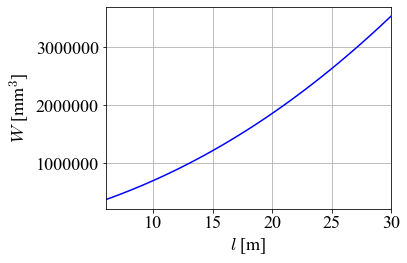

In [28]:
fig, ax = plt.subplots(1, 1)
ax.plot(ls/1e3,W_bT,'-b')
ax.set_xlabel('$l$ [m]')
ax.set_ylabel('$W$ [mm$^3$]')
ax.set_xlim(ls[0]/1e3,ls[-1]/1e3)
plt.tight_layout()
plt.grid()
plt.show()

# Design value method and partial factors

Although modern structural design codes (like Eurocodes) allow reliability based design, they propose simpler design procedures in the **semi-probabilistic design format**, where design equations are written in the **load and resistance factor design format (LRFD)**. This format is referred to as **semi-probabilistic**, since random variables (represented by distribution functions) are reduced to design values, which are obtained from characteristic values as $r_d=r_k/\gamma_R$ (for resistance) and $s_d=s_k/\gamma_S$ (for actions). The format is simpler, since the designer can check the design just by comparing design values, without the necessity of using reliability analysis.

The design equation of the beam above is: 

\begin{equation*}
W\cdot f_{m,d}-g_d\dfrac{l^2}{8}-q_d\dfrac{l}{4}\le 0$
\label{eq:deseq} \tag{3}
\end{equation*}

where:

- $f_{m,d}=\dfrac{f_{m,k}}{\gamma_R}$; $g_{d}=g_k\gamma_G$ and $q_{d}=q_k\gamma_Q$ are the **design values**;

- $f_{m,k}=F_{F_m}^{-1}(k_{F_m})$; $g_{k}=F_{G}^{-1}(k_{G})$ and $q_{k}=F_{Q}^{-1}(k_{Q})$ are the **characteristic values** corresponding to the characteristic fractiles $k_{F_m}$, $k_{G}$ and $k_{Q}$, which are defined arbitrarily and

- $\gamma_G$; $\gamma_R$ and $\gamma_Q$ are the **partial safety factors (p.s.f.)**.

The minimum cross-section plastic modulus satisfying the design criterion above is:
\begin{equation*}
W_{min}=\dfrac{g_k\gamma_G \dfrac{l^2}{8}+q_k\gamma_Q \dfrac{l}{4}}{\dfrac{f_{m,k}}{\gamma_R}}
\label{eq:deseq2} \tag{4}
\end{equation*}

## Calibration of partial factors

The partial safety factors for a given span, say, $l=6$m, are computed based on the $\alpha-$values (FORM sensitivity factors), which are:

$
\alpha_{F_m}=\dfrac{-W\sigma_{F_m}}{k} \, \, ; \, \,\alpha_{G}=\dfrac{\left(\sigma_G\dfrac{l^2}{8}\right)}{k} \, \, ; \, \, \alpha_{Q}=\dfrac{\left(\sigma_Q\dfrac{l}{4}\right)}{k}  
$

with:
$
k=\sqrt{\left(W\sigma_{F_m}\right)^2+\left(\sigma_G\dfrac{l^2}{8}\right)^2+\left(\sigma_Q\dfrac{l}{4}\right)^2}
$

In [29]:
def alphafun(w,l):
    aF = -w*sF/np.sqrt((w*sF)**2+(sG*l**2/8)**2+(sQ*l/4)**2)
    aQ = sQ*l/4/np.sqrt((w*sF)**2+(sG*l**2/8)**2+(sQ*l/4)**2)
    aG = sG*l**2/8/ np.sqrt((w*sF)**2+(sG*l**2/8)**2+(sQ*l/4)**2)
    return np.array([aF,aQ,aG])

alpha_display = alphafun(W_bT[0],ls[0])
print("The FORM sensitivity factors for l = 6 m are:")
print(" alpha_F = {af:.2f}\n".format(af=alpha_display[0]),"alpha_Q = {aq:.2f}\n".format(aq=alpha_display[1]),"alpha_G = {ag:.2f}\n".format(ag=alpha_display[2]))

The FORM sensitivity factors for l = 6 m are:
 alpha_F = -0.70
 alpha_Q = 0.71
 alpha_G = 0.13



The partial factors can now be computed based on the $\alpha-$values, the reliability target, and the definition of the fractile value.
\begin{equation*}
\gamma_m=\frac{\left(1+ \Phi^{-1}(k_F) V_F \right)}{\left(1+ \alpha_F\beta_t V_F \right)} 
\label{eq:gF} \tag{5.1}
\end{equation*}

\begin{equation*}
\gamma_G=\frac{\left(1+ \alpha_G\beta_t V_G \right)}{\left(1+ \Phi^{-1}(k_G) V_G \right)} 
\label{eq:gG} \tag{5.2}
\end{equation*}

\begin{equation*}
\gamma_Q=\frac{\left(1+ \alpha_Q\beta_t V_Q \right)}{\left(1+ \Phi^{-1}(k_Q) V_Q \right)}
\label{eq:gQ} \tag{5.3}
\end{equation*}


In [30]:
def psf_alpha(w,l):
    alpha = alphafun(w,l)
    gR = (1 + sp.stats.norm.ppf(kF)*VF)/(1+alpha[0]*bT*VF)
    gQ = (1+alpha[1]*bT*VQ)/(1+sp.stats.norm.ppf(kQ)*VQ)
    gG = (1+alpha[2]*bT*VG)/(1+sp.stats.norm.ppf(kG)*VG)
    return [gR,gQ,gG]

psf_display = psf_alpha(W_bT[0],ls[0])
print("The partial safety factors for l = 6 m are:")
print(" gamma_F = {af:.2f}\n".format(af=psf_display[0]),"gamma_Q = {aq:.2f}\n".format(aq=psf_display[1]),"gamma_G = {ag:.2f}\n".format(ag=psf_display[2]))

The partial safety factors for l = 6 m are:
 gamma_F = 1.24
 gamma_Q = 1.31
 gamma_G = 1.09



With the partial factors and the characteristic values from above, **a one to one correspondence between reliability based design and partial factor design can be established**. However, this is only possible for one **specific span of the beam**. For different spans, the $\alpha-$values would change and with them the partial factors, as demonstrated below.

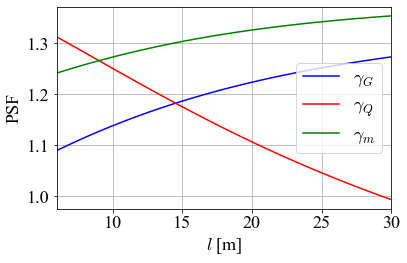

In [31]:
[gRa,gQa,gGa] = psf_alpha(W_bT,ls)
fig, ax = plt.subplots(1, 1)
ax.plot(ls/1e3,gGa,'-b',label=r'$\gamma_{G}$')
ax.plot(ls/1e3,gQa,'-r',label=r'$\gamma_{Q}$')
ax.plot(ls/1e3,gRa,'-g',label=r'$\gamma_{m}$')
ax.set_xlabel('$l$ [m]')
ax.set_ylabel('PSF')
ax.set_xlim(ls[0]/1e3,ls[-1]/1e3)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [32]:
from IPython.display import display, Markdown, clear_output
from matplotlib.figure import figaspect
import json
import ipywidgets as widgets
from matplotlib.figure import figaspect

slider_l = widgets.FloatSlider(
         value=6,
         min=6,
         max=30,
         step=.1,
         description='$l$ [m] =',
         orientation='horizontal',
         readout=True,
         readout_format='2.2f',)

button = widgets.Button(description='Refresh plot')

out = widgets.Output()

def plotslider(l,ax):

    W_rbd = reldesW(l)
    alpha_display = alphafun(W_rbd,l)
    
    ax[0].pie(alpha_display**2,labels=[r'$\alpha_R^2$',r'$\alpha_Q^2$',r'$\alpha_G^2$'],autopct='%1.1f%%')
    ax[0].axis('equal');
    
    psf_display = psf_alpha(W_rbd,l)
    ax[1].bar([r'$\gamma_R$',r'$\gamma_Q$',r'$\gamma_G$'],psf_display)
    plt.tight_layout
    plt.show()
    
def on_button_clicked(b):
    with out:
        clear_output()   
        wp, hp = figaspect(1/3)
        fig, ax = plt.subplots(1, 2,figsize=(wp,hp))
        plotslider(slider_l.value*1e3 ,ax)

button.on_click(on_button_clicked)       
display(widgets.VBox([slider_l,button,out]))

The problem is solved by finding the set of p.s.f which ensures the reliability to be as homogeneous as possible over a range of possible scenarios. The set can be obtained by solving the minimization problem.

\begin{equation*}
\min_{\gamma_R^*,\gamma_G^*,\gamma_Q^*}\left\{ {\sum}_{i=1}^n\left(\beta_t-\beta_i(\gamma_R,\gamma_G,\gamma_Q,l_i)\right)^2\right\}
\label{eq:gF} \tag{6}
\end{equation*}

In [33]:
W_psf = lambda psf,l: ((chG * psf[2] * l**2/8 + chQ * psf[1]*l/4)/ (chF/psf[0]))
beta_fun = lambda W,l: (W*mF-mG*l**2/8-mQ*l/4)/np.sqrt((W*sF)**2+(sG*l**2/8)**2+(sQ*l/4)**2)

def betadiff(psf):
    
    beta = []
    for l in ls:
        W_min = W_psf(psf,l)
        beta.append(beta_fun(W_min,l))
        
    return np.sum((np.array(beta) - bT)**2)

res = sp.optimize.minimize(betadiff,[1,1,1],method='nelder-mead',options={'xatol': 1e-3, 'disp': True})
PSF_opt = res.x

print("The optimal partial safety factors for l = [6,30] m are:")
print(" gamma_F = {af:.2f}\n".format(af=res.x[0]),"gamma_Q = {aq:.2f}\n".format(aq=res.x[1]),"gamma_G = {ag:.2f}\n".format(ag=res.x[2]))

Optimization terminated successfully.
         Current function value: 0.043783
         Iterations: 37
         Function evaluations: 72
The optimal partial safety factors for l = [6,30] m are:
 gamma_F = 1.35
 gamma_Q = 1.13
 gamma_G = 1.16



If this set of partial factors is used for the design of beams with span $l=[6,30]$ the obtained reliability indices are deviating from $\beta_t$ but the sum of squared differences is minimized. It is interesting to note that the obtained set of partial factors is not very different to the partial factors that are calculated with the design value method above. (see after Equation 5.1-3). The effect on the reliability indices, however, is significant, as seen below where the "optimal solution" is compared with the "design value factors". 

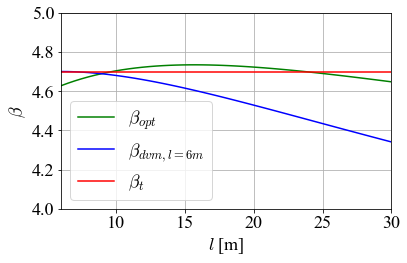

In [34]:
W_min = W_psf(PSF_opt,ls)
beta_cpsf = beta_fun(W_min,ls)
W_min_dvm = W_psf(psf_display,ls)
beta_dpsf = beta_fun(W_min_dvm,ls)
fig, ax = plt.subplots(1, 1)
ax.plot(ls/1e3,beta_cpsf,'-g',label=r'$\beta_{opt}$' )
ax.plot(ls/1e3,beta_dpsf,'-b',label=r'$\beta_{dvm,l=6m}$' )
ax.plot([ls[0]/1e3,ls[-1]/1e3],np.full(2,bT),'r',label=r'$\beta_t$')
ax.set_xlabel('$l$ [m]')
ax.set_ylabel(r'$\beta$')
ax.set_xlim(ls[0]/1e3,ls[-1]/1e3)
ax.set_ylim(4.0,5.0)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

An alternative (and older) format of semi-probabilistic design equations makes use of the global safety factor ($SF$). The design equation with the global safety factor applied on the mean values reads:

\begin{equation}\label{eq:SF}
\dfrac{W\mu_{F_m}}{\mu_G\dfrac{l^2}{8}+\mu_Q\dfrac{l}{4}}>SF
\tag{7}
\end{equation}

where the numerator is the mean value of the moment resistance and the denominator is the mean value of the action induced moment.

The minimum cross-section plastic modulus satisfying Eq.$\eqref{eq:SF}$ is:

\begin{equation}\label{eq:c6e12}
W_{min}=\dfrac{SF}{\mu_{F_m}}\left(\mu_G\dfrac{l^2}{8}+\mu_Q\dfrac{l}{4}\right)
\tag{8}
\end{equation}


### Calibration of the global safety factor for a given span
As before, $SF$ can be calibrated so that Eq.$\eqref{eq:c6e12}$  provides a design with the target level of risk. The limit state function in Eq.(1) is rewritten with $W= W_{min}$:

\begin{equation}
    g(f_m,g,q)=\dfrac{SF}{\mu_{F_m}}\left(\mu_G\dfrac{l^2}{8}+\mu_Q\dfrac{l}{4}\right)\cdot f_m-g\dfrac{l^2}{8}-q\dfrac{l}{4}\le 0
    \tag{9}
\end{equation}

Consequently the reliability index is computed as:

\begin{equation}
    \beta = \dfrac{\dfrac{SF}{\mu_{F_m}}\left(\mu_G\dfrac{l^2}{8}+\mu_Q\dfrac{l}{4}\right)\mu_{F_m}-\mu_G\dfrac{l^2}{8}-\mu_Q\dfrac{l}{4}}{\sqrt{\left(\dfrac{SF}{\mu_{F_m}}\left(\mu_G\dfrac{l^2}{8}+\mu_Q\dfrac{l}{4}\right)\sigma_{F_m}\right)^2+\left(\sigma_G\dfrac{l^2}{8}\right)^2+\left(\sigma_Q\dfrac{l}{4}\right)^2}}
    \tag{10}
\end{equation}

where it is clear that the reliability of the design is depending on the global safety factor, i.e. $\beta=\beta(SF)$.
\par
The global safety factor is calibrated by setting $\beta(SF)\equiv \beta_t$. As an example, considering $l=6$ m, the calibrated global safety factor is found to be $SF^*=2.51$, giving $W=3.01\cdot 10^5$.

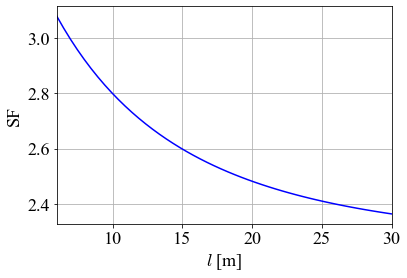

In [35]:
SF = W_bT*mF/(mG*ls*ls/8+mQ*ls/4)
fig, ax = plt.subplots(1, 1)
ax.plot(ls/1e3,SF,'-b')
ax.set_xlabel('$l$ [m]')
ax.set_ylabel('SF')
ax.set_xlim(ls[0]/1e3,ls[-1]/1e3)
plt.grid()
plt.show()

### Calibration of the global safety factor for different beam spans

As before, the design performed with the calibrated $SF$ for $l=6$ m results in a different reliability for different spans. The $SF$ can be calibrated so to give a reliability as homogeneous as possible over the different design scenarios. Therefore, as previously, the $SF$ can be calibrated by solving a minimization problem. 

\begin{equation}\label{eq:c6e15}
\min_{SF^*}\left\{ {\sum}_{i=1}^n\left(\beta_t-\beta_i(SF^*,l_i)\right)^2\right\}
\tag{11}
\end{equation}

The optimized $SF$ obtained is $SF^*=2.58$.

In [36]:
W_sf = lambda sf,l:  sf/mF * (mG*l**2/8 + mQ*l/4)  # W as a function of SF and l

# minimum W using SF for l = 6m
W_min = W_sf(SF[0],ls)                             
beta = beta_fun(W_min,ls)


def betadiffSF(sf):
    """compute sum of square difference over lengths for given SF"""
    beta = []
    for l in ls:
        W_min = W_sf(sf,l)
        beta.append(beta_fun(W_min,l))
        
    return np.sum((np.array(beta) - bT)**2)

res = sp.optimize.minimize(betadiffSF,3,method='nelder-mead',options={'xatol': 1e-5, 'disp': True})
SF_opt = res.x[0]    # Optimal SF
print("The optimal global safety factor for l = [6,30] m is:")
print(" SF = {sf:.2f}\n".format(sf=res.x[0]))

Optimization terminated successfully.
         Current function value: 6.471390
         Iterations: 17
         Function evaluations: 34
The optimal global safety factor for l = [6,30] m is:
 SF = 2.58



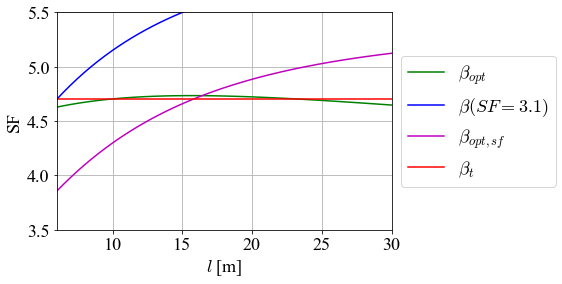

In [37]:
W_min = W_sf(SF_opt,ls)
beta_SFopt = beta_fun(W_min,ls)

fig, ax = plt.subplots(1, 1)
ax.plot(ls/1e3,beta_cpsf,'-g',label=r'$\beta_{opt}$' )
ax.plot(ls/1e3,beta,'-b',label=r'$\beta(SF=3.1)$')
ax.plot(ls/1e3,beta_SFopt,'-m',label=r'$\beta_{opt,sf}$')
ax.plot([ls[0]/1e3,ls[-1]/1e3],np.full(2,bT),'r',label=r'$\beta_t$')
ax.set_xlabel('$l$ [m]')
ax.set_ylabel('SF')
ax.set_xlim(ls[0]/1e3,ls[-1]/1e3)
ax.set_ylim(3.5,5.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()